First we generate the balance and card transactions dataset. We assume that there is a weak relationship between card transactions and balance. The assumption is that users with more balance will use their card more often. This relationship is weak because users with more balance will generally make bigger payments, but not necessarily more frequent payments.

In [13]:
import numpy as np
import pandas as pd

num_records = 100000
proportion_small = 0.7

# Define a correlated engagement index, skewed toward extreme values
user_engagement_index_low = np.random.triangular(left=0, mode=0.1, right=0.7, size=int(num_records * proportion_small))
user_engagement_index_high = np.random.triangular(left=0.6, mode=0.8, right=1, size=int(num_records * (1 - proportion_small)))
user_engagement_index = np.concatenate([user_engagement_index_low, user_engagement_index_high])

# Add random noise to the engagement index
proportion_noise = 0.5
noise = np.random.normal(loc=0.5, scale=0.3, size=num_records)
user_engagement_index_noisy = noise * (proportion_noise) + user_engagement_index * (1-proportion_noise)

# Derive the balance and the card transactions using the engagement indexes
average_balance_last_90d = (user_engagement_index * 10000).round(2)
nb_card_transactions_last_90d = (user_engagement_index_noisy * 250)
# Create DataFrame
df = pd.DataFrame({
    "average_balance_last_90d": average_balance_last_90d,
    "nb_card_transactions_last_90d": nb_card_transactions_last_90d
})

# Filter out irrelevant records generated by the noise
df = df[(df['nb_card_transactions_last_90d'] >= 0)]
df = df[(df['average_balance_last_90d'] >= 0)]

df.head()

,average_balance_last_90d,nb_card_transactions_last_90d
0,1204.00,97.309912
1,3009.50,54.789512
2,1866.03,78.622251
3,6329.09,147.456682
4,2630.75,60.443239


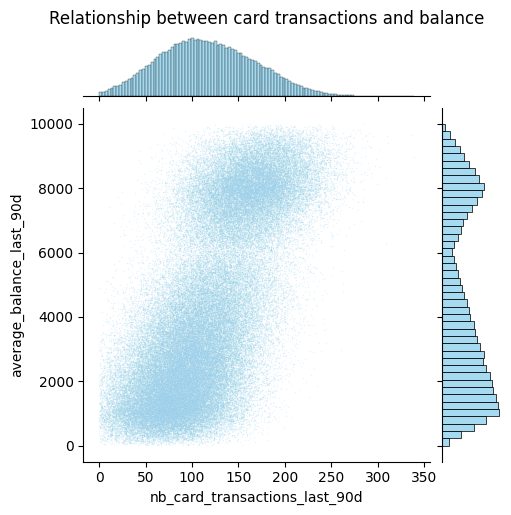

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x='nb_card_transactions_last_90d', y='average_balance_last_90d', data=df, kind='scatter', color='skyblue', alpha=0.2, marker='o', height=5, s=1)
plt.suptitle('Relationship between card transactions and balance', y=1.02)
plt.show()